# 1. IMPORT LIBRARIES

In [191]:
import numpy as np
import pandas as pd
import sys
print('Python version: {}'.format(sys.version))
print('Numpy: {}'.format(np.version))
print('Pandas: {}'.format(pd.__version__))

Python version: 3.10.4 | packaged by conda-forge | (main, Mar 30 2022, 08:38:02) [MSC v.1916 64 bit (AMD64)]
Numpy: <module 'numpy.version' from 'c:\\Users\\PandiyaDS\\anaconda3\\envs\\env1\\lib\\site-packages\\numpy\\version.py'>
Pandas: 1.4.2


In [192]:
# Data Pre-processing
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [193]:
# Feature Engineering
from sklearn.feature_selection import SelectKBest, chi2
from scipy import stats as stats
import statsmodels.formula.api as smf

In [194]:
# ML packages
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor # Decision Tree
from sklearn.ensemble import RandomForestRegressor # Random Forest
from sklearn import linear_model, preprocessing # Linear Regression
from sklearn.metrics import r2_score
from xgboost import XGBRegressor, plot_importance

In [195]:
# Visual
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as plx
%matplotlib inline

In [196]:
# File system
import os
from os import listdir
from os.path import isfile, join
# Warning
import warnings
warnings.filterwarnings('ignore')

# 2. READ DATA

In [197]:
df = pd.read_csv('train.csv')
pd.set_option('display.max_columns', None)
df.head()
# Attribute Information:
#     1. CRIM      per capita crime rate by town
#     2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
#     3. INDUS     proportion of non-retail business acres per town
#     4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#     5. NOX       nitric oxides concentration (parts per 10 million)
#     6. RM        average number of rooms per dwelling
#     7. AGE       proportion of owner-occupied units built prior to 1940
#     8. DIS       weighted distances to five Boston employment centres
#     9. RAD       index of accessibility to radial highways
#     10. TAX      full-value property-tax rate per $10,000
#     11. PTRATIO  pupil-teacher ratio by town
#     12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#     13. LSTAT    % lower status of the population
#     14. MEDV     Median value of owner-occupied homes in $1000's

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28,14.8
1,1,0.02875,28.0,15.04,0,0.464,6.211,28.9,3.6659,4,270.0,18.2,396.33,6.21,25.0
2,2,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59,41.3
3,3,5.66637,0.0,18.10,0,0.740,6.219,100.0,2.0048,24,666.0,20.2,395.69,16.59,18.4
4,4,0.04544,0.0,3.24,0,0.460,6.144,32.2,5.8736,4,430.0,16.9,368.57,9.09,19.8


In [198]:
df.shape

(400, 15)

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       400 non-null    int64  
 1   CRIM     400 non-null    float64
 2   ZN       400 non-null    float64
 3   INDUS    400 non-null    float64
 4   CHAS     400 non-null    int64  
 5   NOX      400 non-null    float64
 6   RM       400 non-null    float64
 7   AGE      400 non-null    float64
 8   DIS      400 non-null    float64
 9   RAD      400 non-null    int64  
 10  TAX      400 non-null    float64
 11  PTRATIO  400 non-null    float64
 12  B        400 non-null    float64
 13  LSTAT    400 non-null    float64
 14  MEDV     400 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 47.0 KB


In [200]:
df.isnull().sum()

ID         0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [201]:
df.describe().round(2) # Checking the data distribution

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00
mean,199.50,3.76,10.97,10.94,0.07,0.55,6.29,68.09,3.82,9.46,403.80,18.46,359.46,12.67,22.48
std,115.61,9.16,22.80,6.85,0.26,0.12,0.71,28.39,2.13,8.69,169.66,2.15,86.73,7.21,9.22
min,0.00,0.01,0.00,0.46,0.00,0.38,4.14,2.90,1.13,1.00,187.00,12.60,0.32,1.92,5.00
25%,99.75,0.08,0.00,5.13,0.00,0.45,5.88,42.38,2.11,4.00,277.00,17.40,376.12,6.99,17.10
50%,199.50,0.24,0.00,8.56,0.00,0.53,6.21,76.95,3.27,5.00,329.00,18.95,391.58,10.88,21.00
75%,299.25,3.54,12.50,18.10,0.00,0.62,6.62,93.82,5.21,24.00,666.00,20.20,396.28,16.91,25.00
max,399.00,88.98,95.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [202]:
# Checking correlation between columns in (%)
df.corr().round(2)*100

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
ID,100.0,-1.0,-4.0,1.0,-3.0,-3.0,6.0,-3.0,1.0,-3.0,-1.0,6.0,-3.0,-2.0,1.0
CRIM,-1.0,100.0,-19.0,41.0,-6.0,42.0,-21.0,35.0,-38.0,62.0,58.0,28.0,-36.0,44.0,-39.0
ZN,-4.0,-19.0,100.0,-52.0,-4.0,-50.0,29.0,-55.0,66.0,-30.0,-30.0,-37.0,16.0,-40.0,34.0
INDUS,1.0,41.0,-52.0,100.0,8.0,76.0,-40.0,63.0,-70.0,61.0,73.0,37.0,-34.0,62.0,-50.0
CHAS,-3.0,-6.0,-4.0,8.0,100.0,8.0,9.0,8.0,-10.0,-2.0,-5.0,-14.0,4.0,-6.0,18.0
NOX,-3.0,42.0,-50.0,76.0,8.0,100.0,-28.0,74.0,-77.0,60.0,66.0,15.0,-38.0,62.0,-43.0
RM,6.0,-21.0,29.0,-40.0,9.0,-28.0,100.0,-20.0,17.0,-19.0,-28.0,-34.0,12.0,-63.0,72.0
AGE,-3.0,35.0,-55.0,63.0,8.0,74.0,-20.0,100.0,-75.0,46.0,50.0,23.0,-27.0,59.0,-35.0
DIS,1.0,-38.0,66.0,-70.0,-10.0,-77.0,17.0,-75.0,100.0,-49.0,-52.0,-19.0,27.0,-50.0,24.0
RAD,-3.0,62.0,-30.0,61.0,-2.0,60.0,-19.0,46.0,-49.0,100.0,91.0,46.0,-40.0,50.0,-39.0


## Observation
----------------
1. Rows: 400 and Columns: 15
2. Non of the column have Null values.
3. All columns have data type float or int type.
4. Median value of the house range between 5K $ to 50k $.
5. Except column ID, MEDV have strong correlation with other independent variables.

# 3. DATA PRE-PROCESSING

## 3.1 Data Distribution

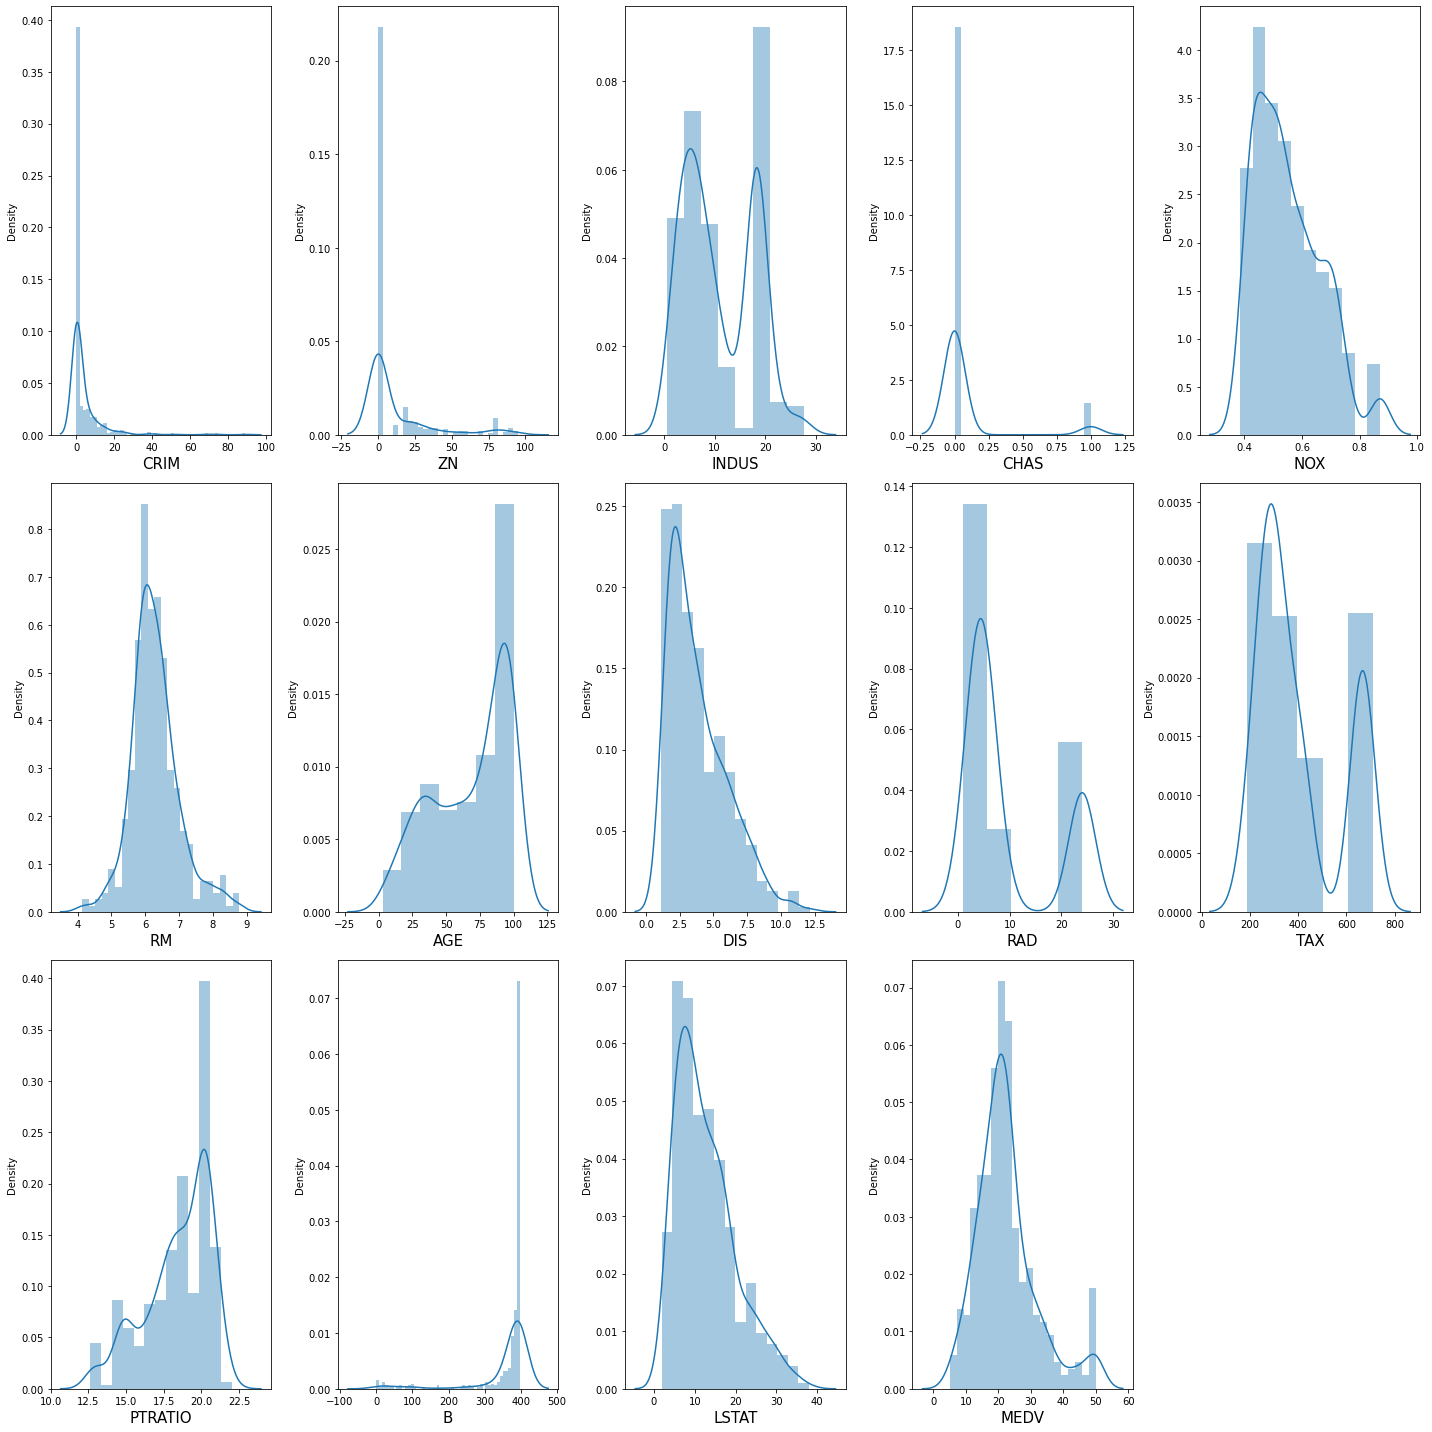

In [203]:
# Frequency (Density) plot for all features and check for improvement
plt.figure(figsize=(20, 20))
pltnumber = 1

for column in df.iloc[:, 1:]:
    if pltnumber <= 14:
        ax = plt.subplot(3, 5, pltnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=15)
    pltnumber += 1
plt.tight_layout()
plt.show()

In [204]:
# Apply Normalization using Log Transformation for DIS (skewed to left) & MEDV columns
df.DIS = np.log(df.DIS)
df.MEDV = np.log(df.MEDV)

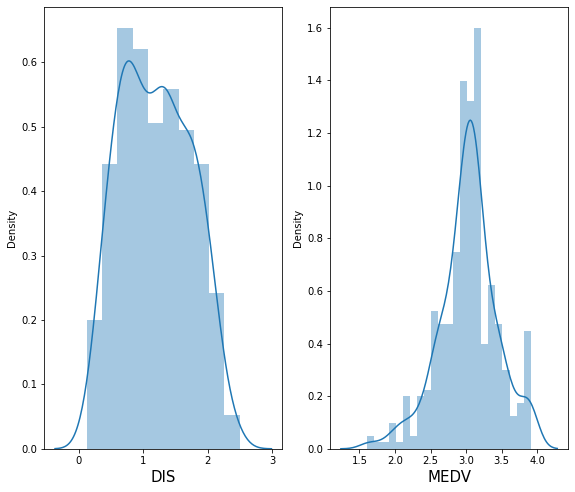

In [205]:
# Data Distribution of DIS & MEDV after normalization
plt.figure(figsize=(20, 20))
pltnumber = 1

for column in df[['DIS', 'MEDV']]:
    if pltnumber <= 2:
        ax = plt.subplot(3, 5, pltnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=15)
    pltnumber += 1
plt.tight_layout()
plt.show()

## 3.2 Outliers

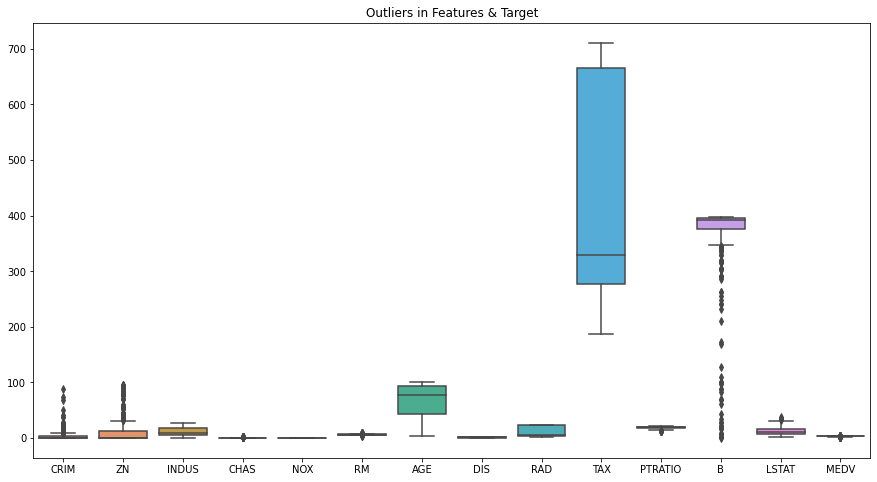

Column CRIM outliers = 13.25%
Column ZN outliers = 13.00%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 6.25%
Column AGE outliers = 0.00%
Column DIS outliers = 0.00%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 3.25%
Column B outliers = 14.50%
Column LSTAT outliers = 1.50%
Column MEDV outliers = 9.50%


In [206]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.iloc[:, 1:])
plt.title('Outliers in Features & Target')
plt.show()

# Interquartile range
for k, v in df.iloc[:, 1:].items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5*irq) | (v >= q3 + 1.5*irq)]
    prec = np.shape(v_col)[0] * 100 / np.shape(df.iloc[:, 1:])[0]
    print('Column %s outliers = %.2f%%' % (k, prec))

In [207]:
df.shape # Before applying Z-Score method

(400, 15)

In [209]:
# Using Z-Score to remove outliers which falls over 3 STD
z = np.abs(stats.zscore(df.iloc[:, :-1]))
df.iloc[:, :-1] = df.iloc[:, :-1][(z<3) & (z>-3)]
df.shape # 0 rows removed

(400, 15)

In [210]:
df.isnull().sum()
# After outliers removal, we have several null values

ID          0
CRIM        7
ZN         22
INDUS       0
CHAS       29
NOX         0
RM          5
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B          21
LSTAT       4
MEDV        0
dtype: int64

In [212]:
# Fill the null values with mean value of each column as replacement
df.CRIM.fillna(df.CRIM.mode()[0], inplace=True)
df.ZN.fillna(df.ZN.mode()[0], inplace=True)
df.CHAS.fillna(1, inplace=True) # Fill nan with 1
df.RM.fillna(df.RM.mode()[0], inplace=True)
df.B.fillna(df.B.mode()[0], inplace=True)
df.LSTAT.fillna(df.LSTAT.mode()[0], inplace=True)

In [214]:
df.isnull().sum() # No nan values

ID         0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

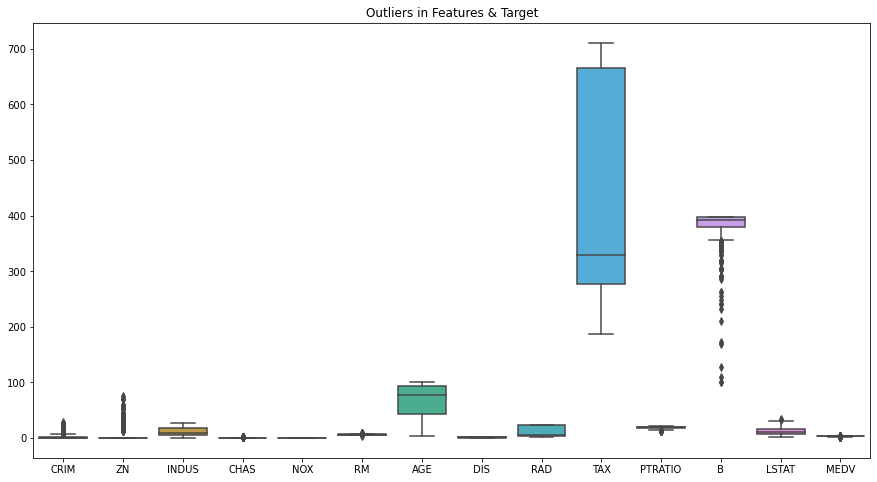

Column CRIM outliers = 15.25%
Column ZN outliers = 100.00%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.00%
Column AGE outliers = 0.00%
Column DIS outliers = 0.00%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 3.25%
Column B outliers = 12.00%
Column LSTAT outliers = 0.50%
Column MEDV outliers = 9.50%


In [215]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.iloc[:, 1:])
plt.title('Outliers in Features & Target')
plt.show()

# Interquartile range
for k, v in df.iloc[:, 1:].items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5*irq) | (v >= q3 + 1.5*irq)]
    prec = np.shape(v_col)[0] * 100 / np.shape(df.iloc[:, 1:])[0]
    print('Column %s outliers = %.2f%%' % (k, prec))

## 3.3 Standarization

In [216]:
# Apply Standarization to Normally Distributed dataset using scikit
scaler = StandardScaler()
X = scaler.fit_transform(df.iloc[:, 1:-1])

In [217]:
X_scaled = pd.DataFrame(X, columns=df.iloc[:, 1:-1].columns)
X_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.345890,-0.443943,-0.408865,-0.279584,-0.128455,-0.357953,0.730617,0.554320,-0.629566,-0.571263,1.184385,-1.722866,0.715404
1,-0.523642,1.526792,0.599984,-0.279584,-0.770017,-0.109248,-1.382155,0.195870,-0.629566,-0.789624,-0.120722,0.431962,-0.900272
2,-0.294539,-0.443943,1.263777,-0.279584,0.452418,1.000825,1.033953,-1.036898,-0.514314,-0.004707,-1.752106,-0.356185,-1.136713
3,0.557343,-0.443943,1.047386,-0.279584,1.622834,-0.097116,1.125659,-0.915858,1.675481,1.547423,0.811497,0.416630,0.614698
4,-0.520441,-0.443943,-1.125294,-0.279584,-0.804696,-0.210853,-1.265758,1.064198,-0.629566,0.154638,-0.726665,-0.233052,-0.479934


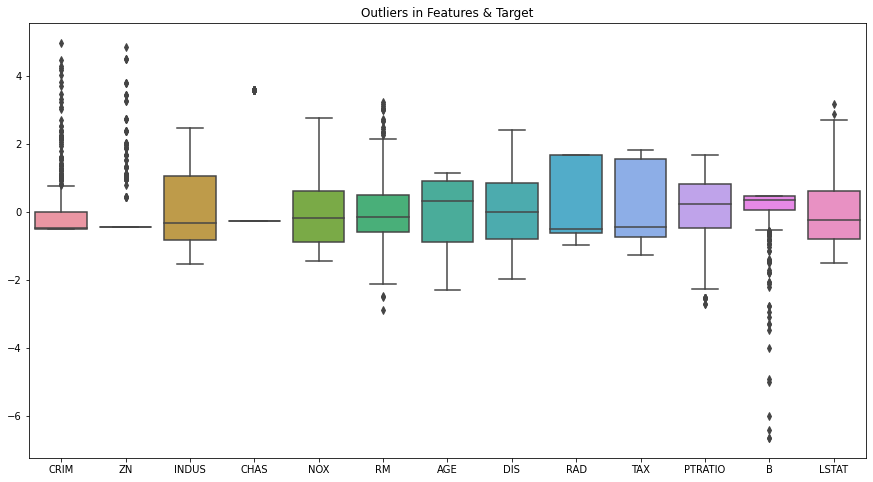

Column CRIM outliers = 15.25%
Column ZN outliers = 100.00%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.00%
Column AGE outliers = 0.00%
Column DIS outliers = 0.00%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 3.25%
Column B outliers = 12.00%
Column LSTAT outliers = 0.50%


In [218]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=X_scaled)
plt.title('Outliers in Features & Target')
plt.show()

for k, v in X_scaled.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5*irq) | (v >= q3 + 1.5*irq)]
    prec = np.shape(v_col)[0] * 100 / np.shape(X_scaled)[0]
    print('Column %s outliers = %.2f%%' % (k, prec))

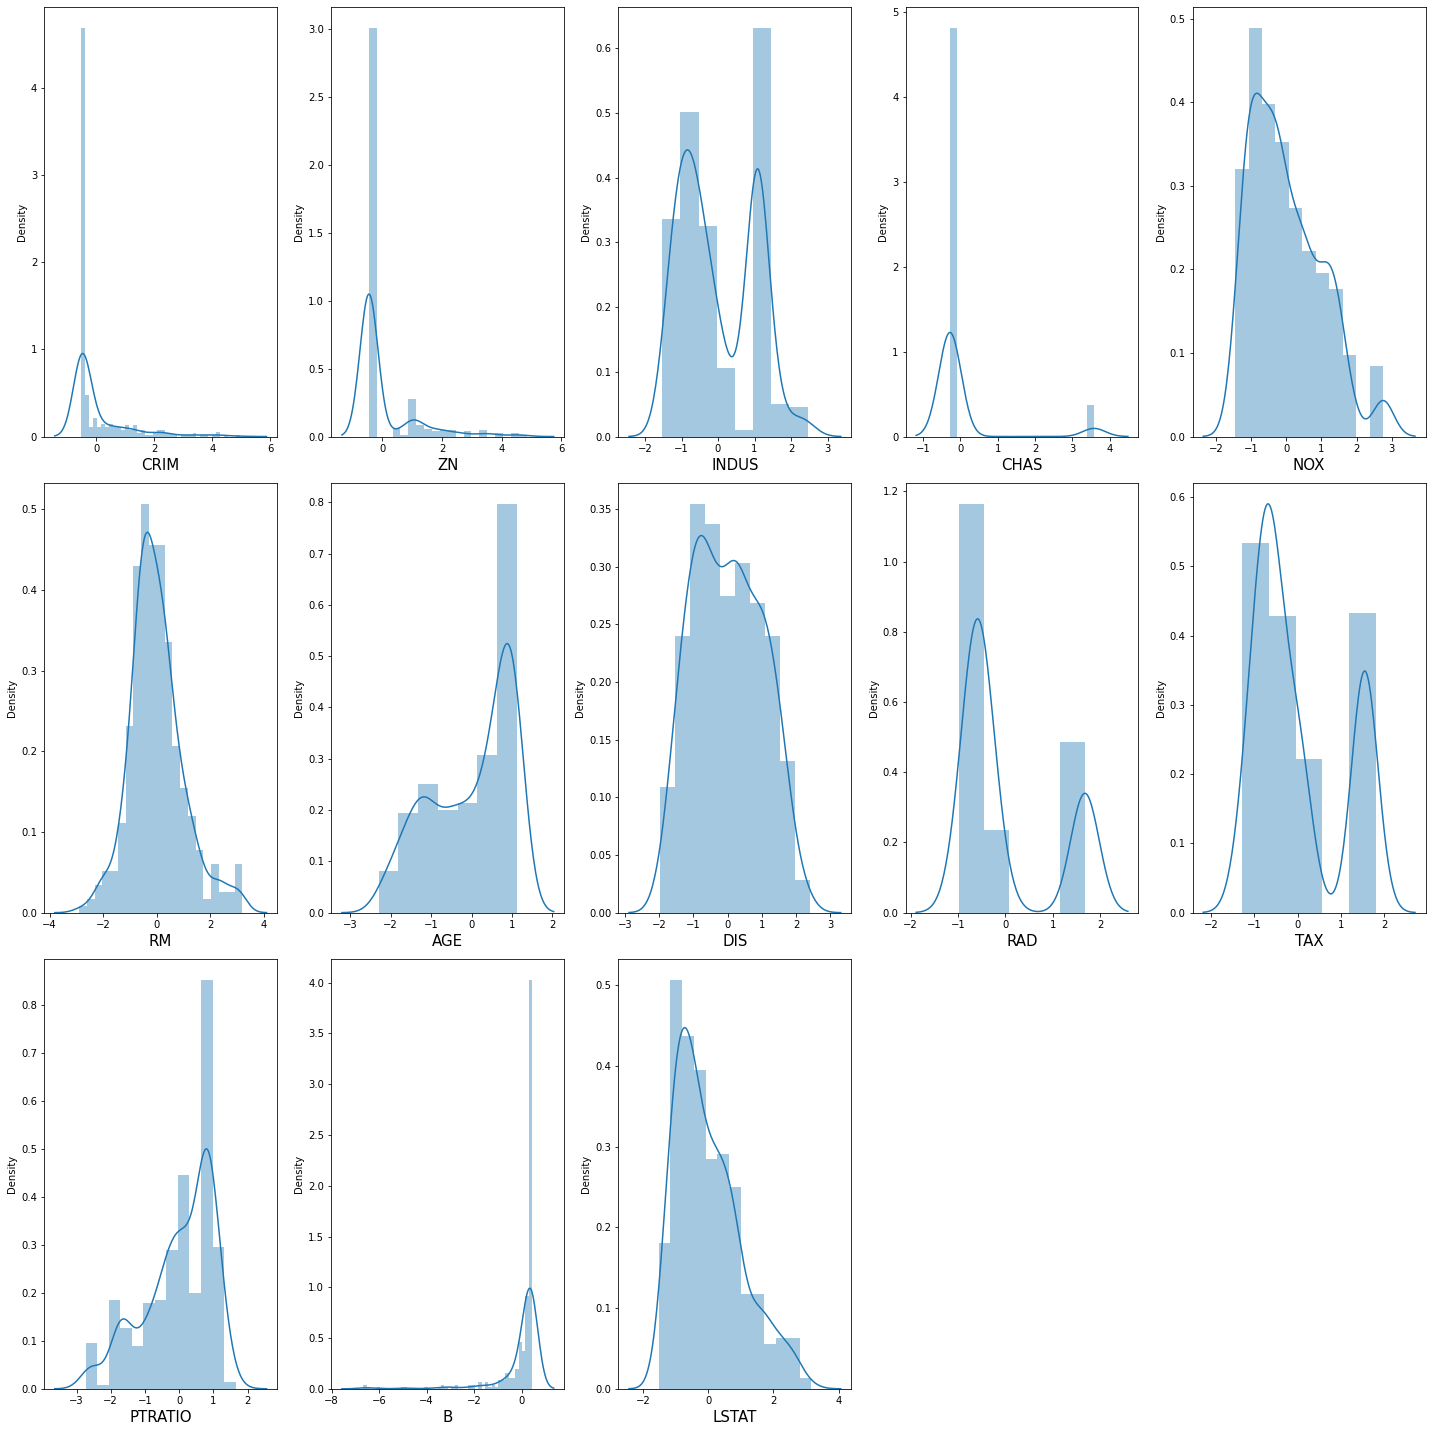

In [219]:
# X_scaled distribution charts
plt.figure(figsize=(20, 20))
pltnumber = 1

for column in X_scaled:
    if pltnumber <= 13:
        ax = plt.subplot(3, 5, pltnumber)
        sns.distplot(X_scaled[column])
        plt.xlabel(column, fontsize=15)
    pltnumber += 1
plt.tight_layout()
plt.show()

In [220]:
# Checking for Variance Inflation Factor value
# A variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables. 
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif['Features'] = X_scaled.columns
vif

,VIF,Features
0,2.801881,CRIM
1,1.410763,ZN
2,4.209445,INDUS
3,1.080201,CHAS
4,5.082630,NOX
5,1.751374,RM
6,3.136544,AGE
7,5.127309,DIS
8,8.063952,RAD
9,8.733005,TAX


## Observation
-------------------
1. We use Log Transformation to normalize the DIS & MEDV columns. Almost all the features have many outliers and hence Z-Score was used to remove outliers and null values were filled with mean of the column.
2. Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.
3. We will use the standardization technique to perform feature scaling. Standardization: It is a very effective technique which re-scales a feature value so that it has distribution with 0 mean value and variance equals to 1. The tool we will use is StandardScaler from the preprocessing library in Scikitlearn.
4. VIF represents the factor by which the correlations amongst the predictors inflate the variance. VIF value of over 3 is considered less reliable for regression results.

# 4. FEATURE ENGINEERING

## 4.1 Dimensionality Reduction

### 4.1.1 Correlation graph

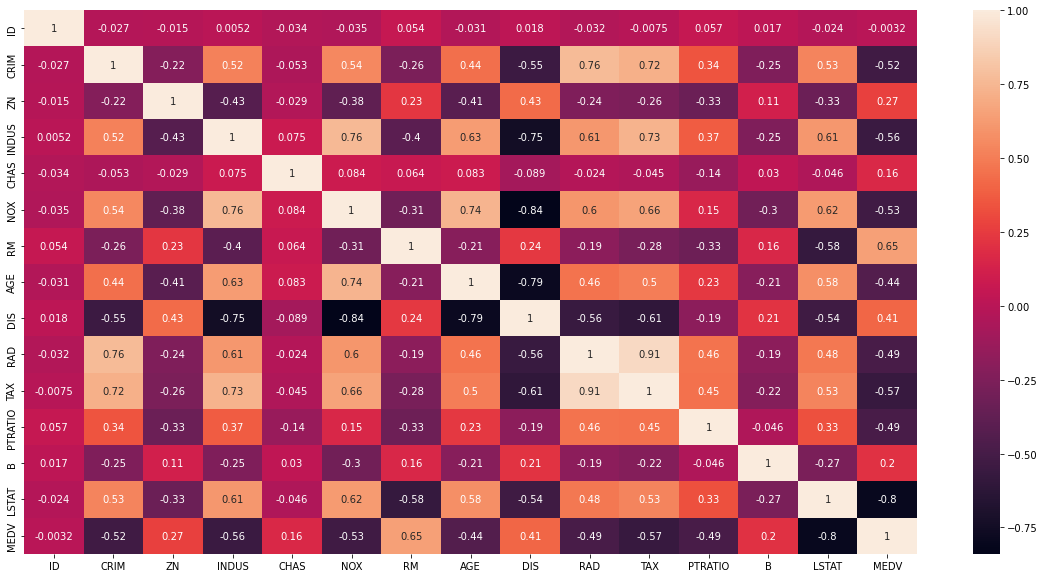

In [222]:
# Heat map
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

#### Observation
------------------
1. Columns with correlation value less than 5% or more than 90% can be removed.
2. Here column ID w.r.t MEDV is less than 5%.
3. Correlation b/w RAD & TAX is 91%, which means multi-collinearity exists. We need to investigate more on this so as to choose which column to eliminate.

### 4.1.2 RAD & TAX column Analysis

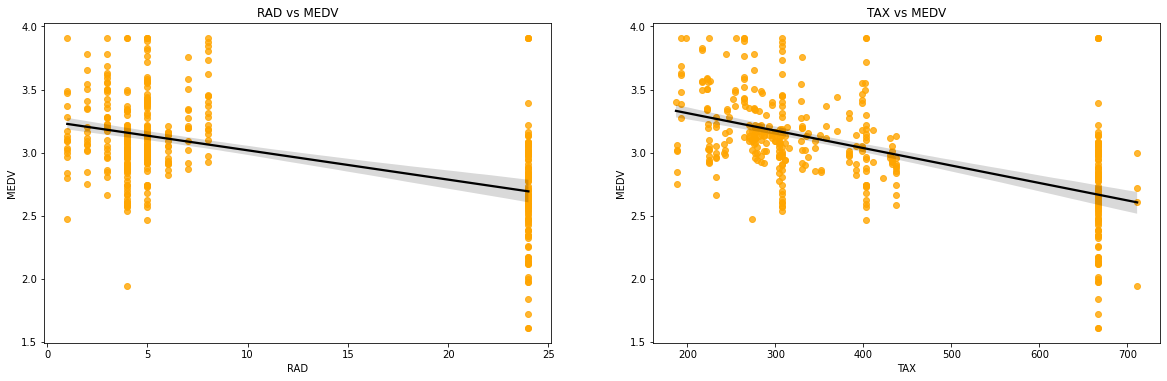

In [223]:
# Scatter plot between RAD & TAX vs MEDV
plt.figure(figsize=(20, 20))
plt.subplot(321)
sns.regplot(x=df.RAD, y=df.MEDV, scatter_kws={'color':'orange'}, line_kws={'color':'black'})
plt.title('RAD vs MEDV')

plt.subplot(322)
sns.regplot(x=df.TAX, y=df.MEDV, scatter_kws={'color':'orange'}, line_kws={'color':'black'})
plt.title('TAX vs MEDV')

plt.show()

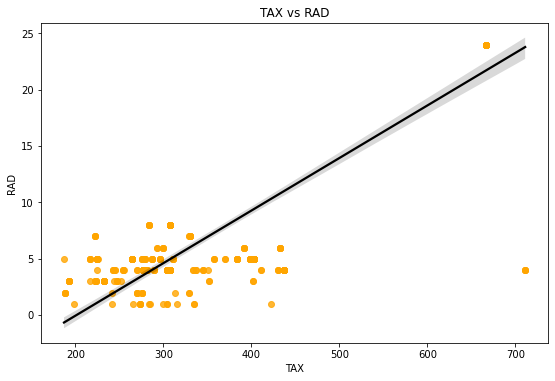

In [224]:
# Scatter plot between RAD VS TAX
plt.figure(figsize=(20, 20))
plt.subplot(321)
sns.regplot(x=df.TAX, y=df.RAD, scatter_kws={'color':'orange'}, line_kws={'color':'black'})
plt.title('TAX vs RAD')
plt.show()

In [225]:
# Correlation value
print('Correlation in (%): ')
(df.corr()[['RAD', 'TAX']])*100

Correlation in (%): 


,RAD,TAX
ID,-3.166903,-0.746031
CRIM,76.403150,71.657314
ZN,-24.320127,-26.312438
INDUS,60.808830,73.161941
CHAS,-2.379202,-4.518315
NOX,60.296038,65.787515
RM,-18.856929,-27.595921
AGE,45.733942,49.947850
DIS,-56.037996,-60.868852
RAD,100.000000,91.110324


In [226]:
lm = smf.ols(formula= 'MEDV ~ RAD', data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     127.0
Date:                Sat, 15 Oct 2022   Prob (F-statistic):           9.25e-26
Time:                        22:59:03   Log-Likelihood:                -155.17
No. Observations:                 400   AIC:                             314.3
Df Residuals:                     398   BIC:                             322.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2512      0.026    122.911      0.000       3.199       3.303
RAD           -0.0232      0.002    -11.271      0.000      -0.027      -0.019
==============================================================================
Omnibus:                       17.286   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.050
Skew:                           0.286   Prob(JB):                     4.92e-07
Kurtosis:                       4.190   Cond. No.                         19.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [228]:
lm = smf.ols(formula= 'MEDV ~ TAX', data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     193.6
Date:                Sat, 15 Oct 2022   Prob (F-statistic):           3.83e-36
Time:                        22:59:42   Log-Likelihood:                -131.30
No. Observations:                 400   AIC:                             266.6
Df Residuals:                     398   BIC:                             274.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5899      0.044     82.481      0.000       3.504       3.675
TAX           -0.0014   9.94e-05    -13.914      0.000      -0.002      -0.001
==============================================================================
Omnibus:                       27.213   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.018
Skew:                           0.419   Prob(JB):                     1.38e-11
Kurtosis:                       4.517   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Observation
--------------
1. Correlation between RAD & TAX is over 95%. Both columns have negative effect on MEDV.
2. Regression line shows they are linear, thus any one feature can be used as choosing one column will reduce the computational time and efficency, also doesn't change the result.
3. TAX correlation with MEDV is 9.24% higher than RAD. From OLS Regression, we choose to remove RAD.

## 4.2 Dropping columns

In [229]:
# Drop unnecessary columns RAD & ID
df.drop(columns=['ID', 'RAD'], inplace=True)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.95577,0.0,8.14,0.0,0.538,6.047,88.8,1.493668,307.0,21.0,306.38,17.28,2.694627
1,0.02875,28.0,15.04,0.0,0.464,6.211,28.9,1.299074,270.0,18.2,396.33,6.21,3.218876
2,1.22358,0.0,19.58,0.0,0.605,6.943,97.4,0.629835,403.0,14.7,363.43,4.59,3.720862
3,5.66637,0.0,18.10,0.0,0.740,6.219,100.0,0.695544,666.0,20.2,395.69,16.59,2.912351
4,0.04544,0.0,3.24,0.0,0.460,6.144,32.2,1.770468,430.0,16.9,368.57,9.09,2.985682


# 5. Exploratory Data Analysis

## 5.1 MEDV - Median Value of House

In [237]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

<AxesSubplot:ylabel='MEDV'>

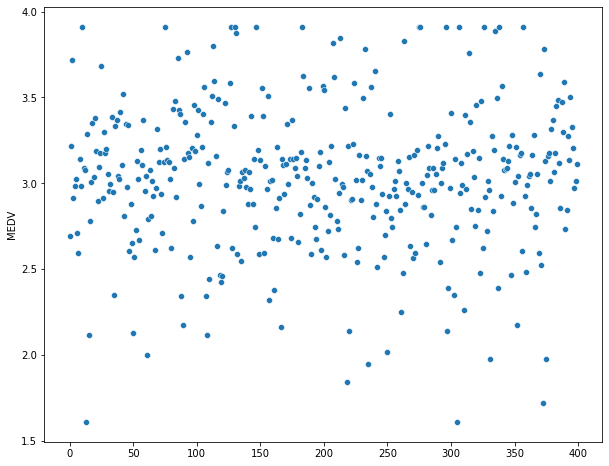

In [255]:
plt.figure(figsize=(10, 8))
sns.scatterplot(y = df.MEDV, x=df.index)

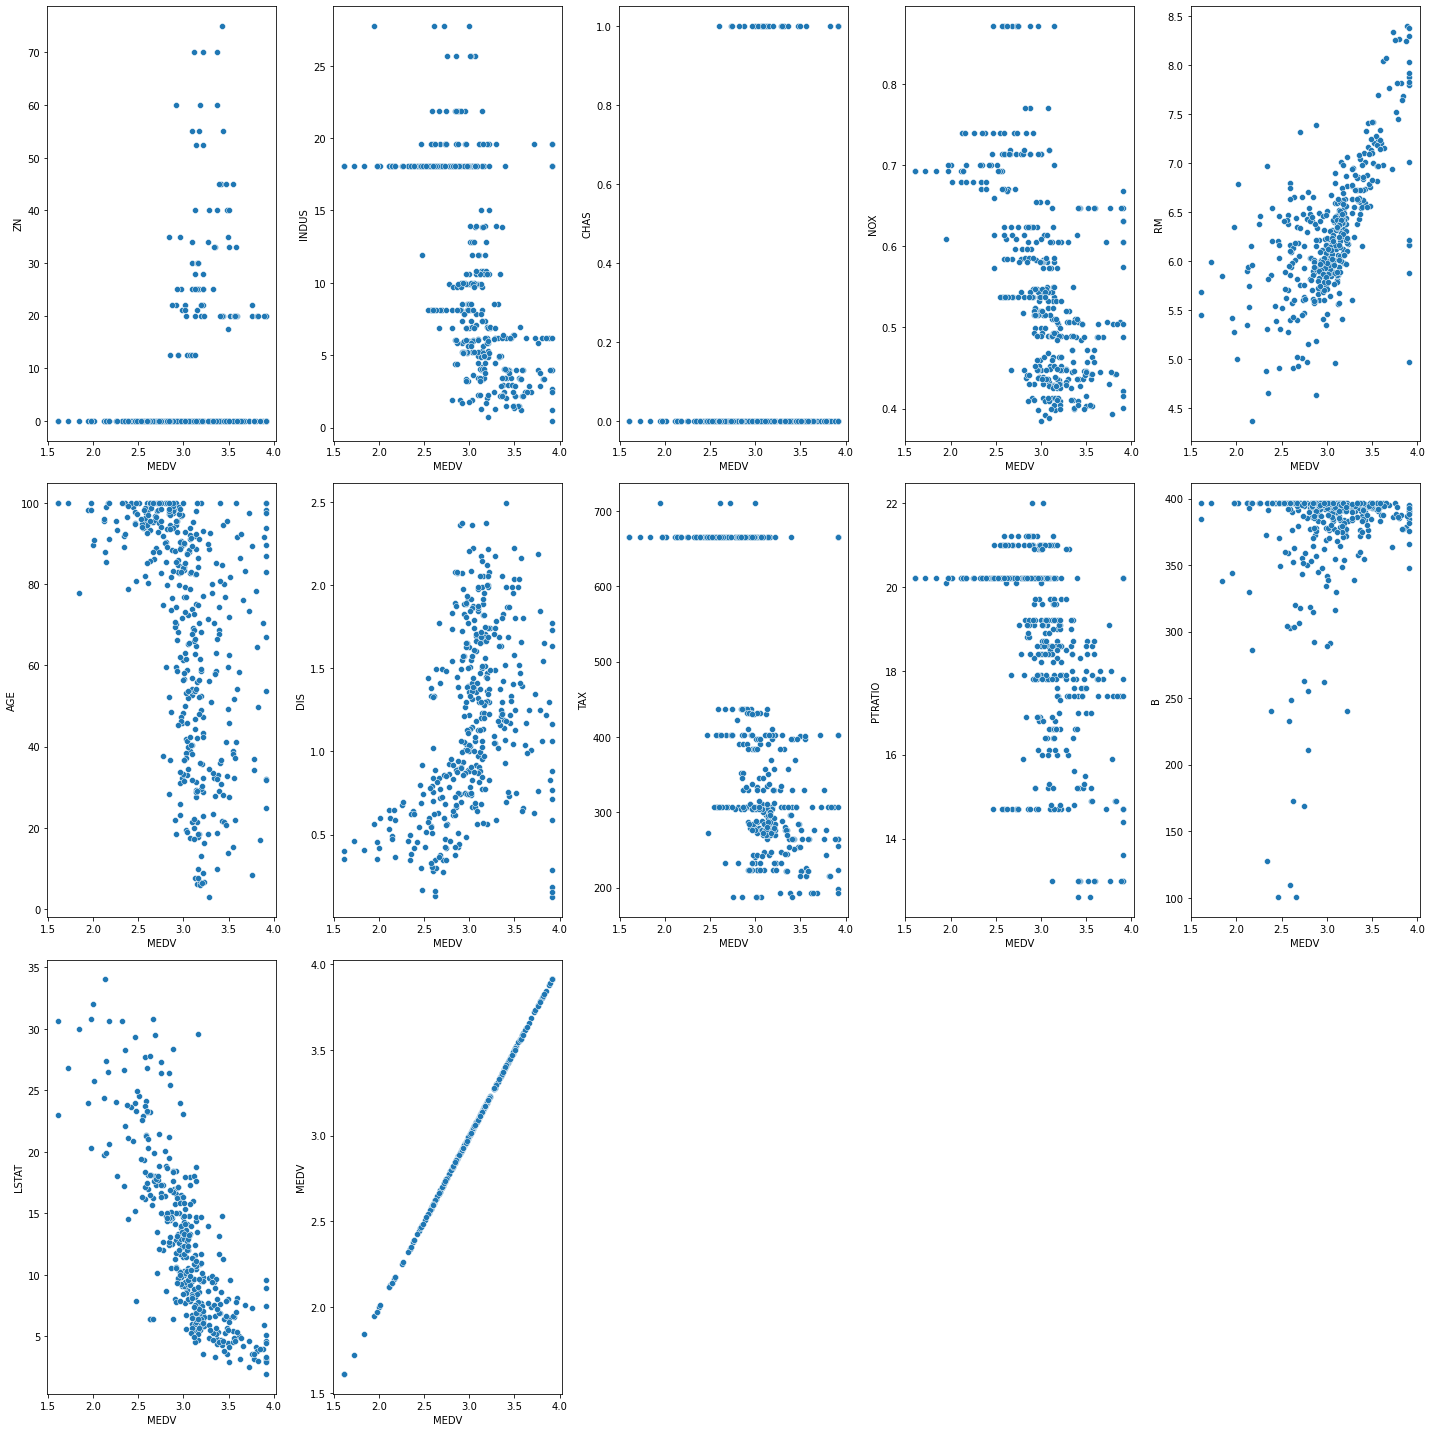

In [247]:
plt.figure(figsize=(20, 20))
pltnumber = 1

for column in df.iloc[:, 1:]:
    if pltnumber <= 14:
        ax = plt.subplot(3, 5, pltnumber)
        sns.scatterplot(x=df.MEDV, y=df[column])
    pltnumber += 1
plt.tight_layout()
plt.show()